Simple Steady State Temperature Solve
======

This notebook will setup and solve the steady state heat equation:

\\[
\nabla(k\nabla)T = h
\\]

where $k$ is the diffusivity, T the temperature field and $h$ the source term.

**Keywords:** initial conditions, boundary conditions, heat equation

In [2]:
import UWGeodynamics as GEO

loaded rc file /opt/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


Setup parameters
-----

In [3]:
u = GEO.UnitRegistry

In [4]:
model_length = 200. * u.kilometer
model_height = 100. * u.kilometer
top_Temp = 283.15 * u.degK
base_Temp = 1573.15 * u.degK

KL = model_height
KT = (base_Temp - top_Temp)

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[temperature]"]= KT

Create mesh and variables
------

In [5]:
Model_1 = GEO.Model(elementRes=(200, 100), 
                  minCoord=(0. * u.kilometer, -100. * u.kilometer), 
                  maxCoord=(200. * u.kilometer, 0. * u.kilometer))
Model_2 = GEO.Model(elementRes=(200, 100), 
                  minCoord=(0. * u.kilometer, -100. * u.kilometer), 
                  maxCoord=(200. * u.kilometer, 0. * u.kilometer))
Model_3 = GEO.Model(elementRes=(200, 100), 
                  minCoord=(0. * u.kilometer, -100. * u.kilometer), 
                  maxCoord=(200. * u.kilometer, 0. * u.kilometer))
Model_4 = GEO.Model(elementRes=(200, 100), 
                  minCoord=(0. * u.kilometer, -100. * u.kilometer), 
                  maxCoord=(200. * u.kilometer, 0. * u.kilometer))

Heat Equation System setup & solve
-----

Temperature field, diffusivity and boundary conditions are passed to the SteadyStateHeat system function.

In [6]:
d = 2700. * u.kilogram / u.metre**3 # density
c = 1000. * u.joule / (u.kelvin * u.kilogram)# capacity
k = 2.5 * u.watt / u.metre / u.kelvin # Conductivity

In [7]:
kappa = k / d / c

In [8]:
kappa

<Quantity(9.25925925926e-07, 'meter ** 2 * watt / joule')>

In [9]:
Model_1.density = 2700. * u.kilogram / u.metre**3
Model_1.diffusivity = kappa
Model_1.capacity    = 1000. * u.joule / (u.kelvin * u.kilogram)
Model_1.radiogenicHeatProd = 1.0 * u.microwatts / u.meter**3
###########
Model_2.density = 2700. * u.kilogram / u.metre**3
Model_2.diffusivity = kappa
Model_2.capacity    = 1000. * u.joule / (u.kelvin * u.kilogram)
Model_2.radiogenicHeatProd = 1.0 * u.microwatts / u.meter**3
##########
Model_3.density = 2700. * u.kilogram / u.metre**3
Model_3.diffusivity = kappa
Model_3.capacity    = 1000. * u.joule / (u.kelvin * u.kilogram)
Model_3.radiogenicHeatProd = 1.0 * u.microwatts / u.meter**3
############
Model_4.density = 2700. * u.kilogram / u.metre**3
Model_4.diffusivity = kappa
Model_4.capacity    = 1000. * u.joule / (u.kelvin * u.kilogram)
Model_4.radiogenicHeatProd = 1.0 * u.microwatts / u.meter**3

In [10]:
TopMaterial_1= Model_1.add_material(name="Top Material", 
                                shape=GEO.shapes.Layer(top=Model_1.top, bottom=-30.*u.kilometer))
BotMaterial_1= Model_1.add_material(name="Bot Material", 
                                shape=GEO.shapes.Layer(top=TopMaterial_1.bottom, bottom=Model_1.bottom))    
#############
TopMaterial_2= Model_2.add_material(name="Top Material", 
                                shape=GEO.shapes.Layer(top=Model_2.top, bottom=-30.*u.kilometer))
BotMaterial_2= Model_2.add_material(name="Bot Material", 
                                shape=GEO.shapes.Layer(top=TopMaterial_2.bottom, bottom=Model_2.bottom))
#############
TopMaterial_3= Model_3.add_material(name="Top Material", 
                                shape=GEO.shapes.Layer(top=Model_3.top, bottom=-30.*u.kilometer))
BotMaterial_3= Model_3.add_material(name="Bot Material", 
                                shape=GEO.shapes.Layer(top=TopMaterial_3.bottom, bottom=Model_3.bottom))    
Sediment_3= Model_3.add_material(name="Sediment", 
                                shape=GEO.shapes.Layer(top=Model_3.top, bottom=-1.*u.kilometer))
#############
TopMaterial_4= Model_4.add_material(name="Top Material", 
                                shape=GEO.shapes.Layer(top=Model_4.top, bottom=-30.*u.kilometer))
BotMaterial_4 = Model_4.add_material(name="Bot Material", 
                                shape=GEO.shapes.Layer(top=TopMaterial_4.bottom, bottom=Model_4.bottom))    
Sediment_4= Model_4.add_material(name="Sediment", 
                                shape=GEO.shapes.Layer(top=Model_4.top, bottom=-1.*u.kilometer))


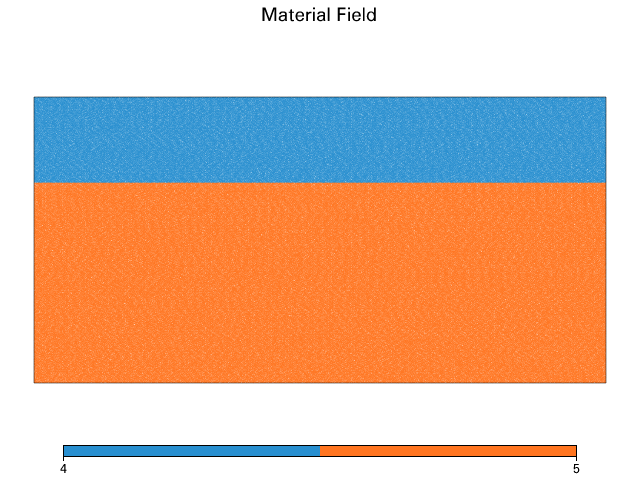


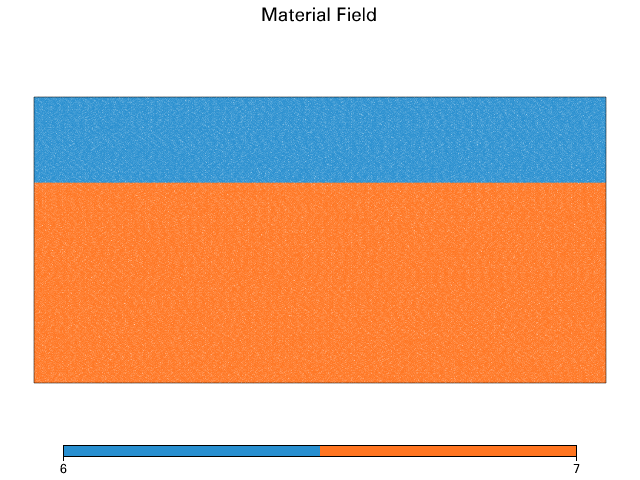


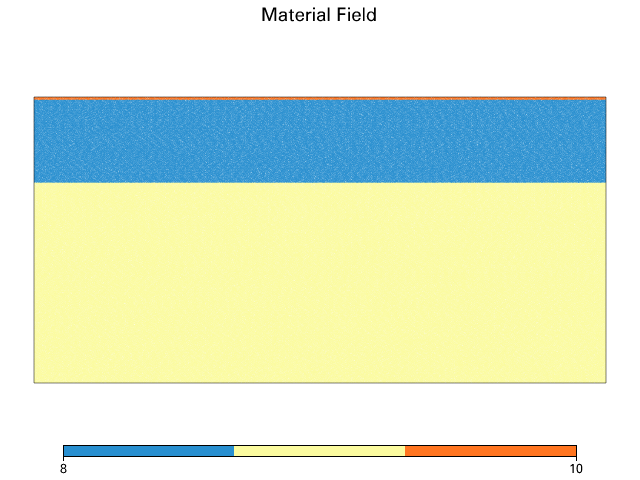


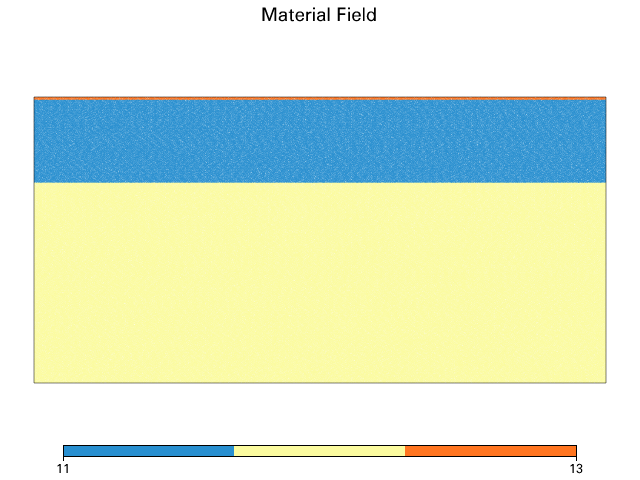

In [11]:
Fig = Model_1.plot.materialField()
Fig = Model_2.plot.materialField()
Fig = Model_3.plot.materialField()
Fig = Model_4.plot.materialField()

# Top Material

In [12]:
d = 2700. * u.kilogram / u.metre**3 # density
c = 1000. * u.joule / (u.kelvin * u.kilogram) # capacity
k = 2.5 * u.watt / u.metre / u.kelvin # Conductivity

kappa = k / d / c

In [13]:
TopMaterial_1.density = d
TopMaterial_1.diffusivity = kappa
TopMaterial_1.capacity    = c
TopMaterial_1.radiogenicHeatProd = 1.0 * u.microwatts / u.meter**3
############
TopMaterial_2.density = d
TopMaterial_2.diffusivity = kappa
TopMaterial_2.capacity    = c
TopMaterial_2.radiogenicHeatProd = 1.0 * u.microwatts / u.meter**3
############
TopMaterial_3.density = d
TopMaterial_3.diffusivity = kappa
TopMaterial_3.capacity    = c
TopMaterial_3.radiogenicHeatProd = 1.0 * u.microwatts / u.meter**3
############
TopMaterial_4.density = d
TopMaterial_4.diffusivity = kappa
TopMaterial_4.capacity    = c
TopMaterial_4.radiogenicHeatProd = 1.0 * u.microwatts / u.meter**3

# Bottom Material

In [14]:
d = 2700. * u.kilogram / u.metre**3 # density
c = 1000. * u.joule / (u.kelvin * u.kilogram) # capacity
k = 2.5 * u.watt / u.metre / u.kelvin # Conductivity

kappa = k / d / c

In [15]:
BotMaterial_1.density = d
BotMaterial_1.diffusivity = kappa
BotMaterial_1.capacity    = c
BotMaterial_1.radiogenicHeatProd = 0.0 * u.microwatts / u.meter**3
###########
BotMaterial_2.density = d
BotMaterial_2.diffusivity = kappa
BotMaterial_2.capacity    = c
BotMaterial_2.radiogenicHeatProd = 0.0 * u.microwatts / u.meter**3
###########
BotMaterial_3.density = d
BotMaterial_3.diffusivity = kappa
BotMaterial_3.capacity    = c
BotMaterial_3.radiogenicHeatProd = 0.0 * u.microwatts / u.meter**3
###########
BotMaterial_4.density = d
BotMaterial_4.diffusivity = kappa
BotMaterial_4.capacity    = c
BotMaterial_4.radiogenicHeatProd = 0.0 * u.microwatts / u.meter**3

# Sediment

In [16]:
d = 2300. * u.kilogram / u.metre**3 # density
c = 1000. * u.joule / (u.kelvin * u.kilogram)
k = 1.5 * u.watt / u.metre / u.kelvin

kappa = k / d / c

In [17]:
Sediment_3.density = d
Sediment_3.diffusivity = kappa
Sediment_3.capacity    = c
Sediment_3.radiogenicHeatProd = 0.0 * u.microwatts / u.meter**3
##########
Sediment_4.density = d
Sediment_4.diffusivity = kappa
Sediment_4.capacity    = c
Sediment_4.radiogenicHeatProd = 0.0 * u.microwatts / u.meter**3

In [18]:
Model_1.set_temperatureBCs(top=283.15 * u.degK, bottom=-30. * u.milliwatt / u.metre**2, bottom_material=BotMaterial_1)
Model_2.set_temperatureBCs(top=283.15 * u.degK, bottom=-50. * u.milliwatt / u.metre**2, bottom_material=BotMaterial_2)#Heat flow Cull 1982
Model_3.set_temperatureBCs(top=283.15 * u.degK, bottom=-30. * u.milliwatt / u.metre**2, bottom_material=BotMaterial_3)
Model_4.set_temperatureBCs(top=283.15 * u.degK, bottom=-50. * u.milliwatt / u.metre**2, bottom_material=BotMaterial_4)#Heat flow Cull 1982

In [19]:
Model_1.solve_temperature_steady_state()
Model_2.solve_temperature_steady_state()
Model_3.solve_temperature_steady_state()
Model_4.solve_temperature_steady_state()


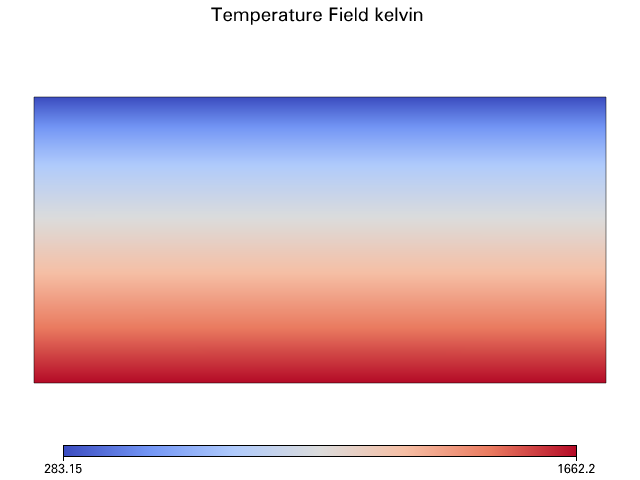


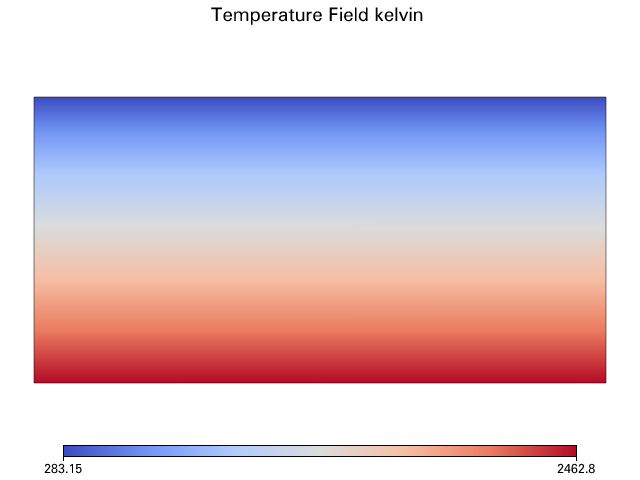


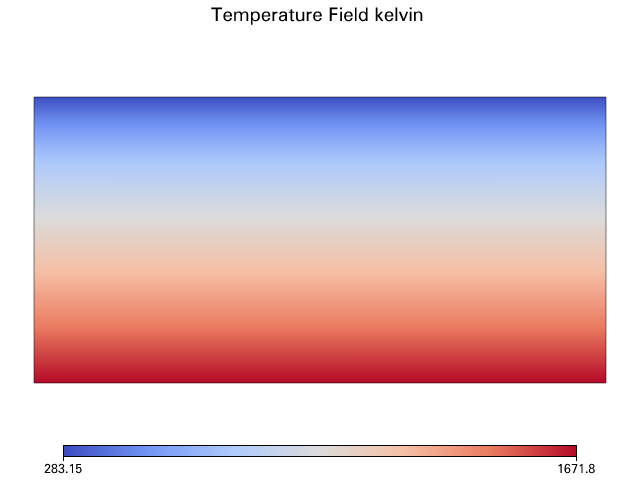


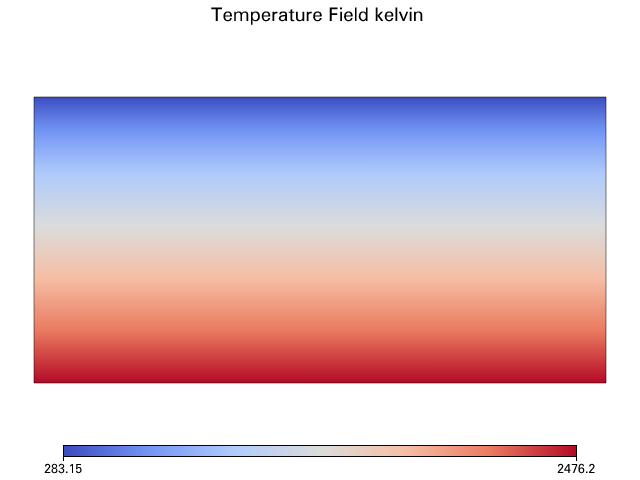

In [20]:
Fig = Model_1.plot.temperature()
Fig = Model_2.plot.temperature()
Fig = Model_3.plot.temperature()
Fig = Model_4.plot.temperature()


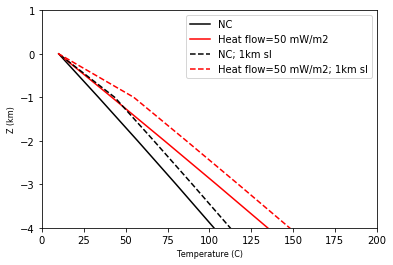

In [23]:
import pylab as plt
Temp_1 = GEO.Dimensionalize(Model_1.temperature.data[Model_1._left_wall.data].ravel(), u.degC)
Depths_1 = GEO.Dimensionalize(Model_1.mesh.data[Model_1._left_wall.data, 1].ravel(), u.kilometer)

Temp_2 = GEO.Dimensionalize(Model_2.temperature.data[Model_2._left_wall.data].ravel(), u.degC)
Depths_2 = GEO.Dimensionalize(Model_2.mesh.data[Model_2._left_wall.data, 1].ravel(), u.kilometer)

Temp_3 = GEO.Dimensionalize(Model_3.temperature.data[Model_3._left_wall.data].ravel(), u.degC)
Depths_3 = GEO.Dimensionalize(Model_3.mesh.data[Model_3._left_wall.data, 1].ravel(), u.kilometer)

Temp_4 = GEO.Dimensionalize(Model_4.temperature.data[Model_4._left_wall.data].ravel(), u.degC)
Depths_4 = GEO.Dimensionalize(Model_4.mesh.data[Model_4._left_wall.data, 1].ravel(), u.kilometer)

plt.ylim(-4.0, 1)
plt.xlim(0,200)
plt.plot(Temp_1, Depths_1, c=(0,0,0), label='NC')
plt.plot(Temp_2, Depths_2,  c=(1,0,0), label='Heat flow=50 mW/m2')#heat flow 50
plt.plot(Temp_3, Depths_3, 'r--',c=(0,0,0), label='NC; 1km sl')
plt.plot(Temp_4, Depths_4, 'r--',c=(1,0,0), label='Heat flow=50 mW/m2; 1km sl')#heat flow 50
plt.legend()

plt.xlabel('Temperature (C)', fontsize=8)
plt.ylabel('Z (km)', fontsize=8)

#plt.savefig("./1D-heat_transfer.pdf")
plt.show()




In [43]:
Depths_1
Temp_1


<Quantity([ 1388.86139556  1376.86124771  1364.86105045  1352.86104695  1340.86098251
  1328.86096229  1316.86093495  1304.86098175  1292.86112293  1280.86135054
  1268.8617321   1256.86228034  1244.86300786  1232.86394127  1220.86509065
  1208.86646349  1196.86807919  1184.86996893  1172.87216197  1160.87467242
  1148.87750536  1136.88066941  1124.884174    1112.88802037  1100.89220233
  1088.89671023  1076.90152932  1064.90663985  1052.91202565  1040.91768218
  1028.92361385  1016.9298252   1004.93631683   992.9430879    980.95013836
   968.95746797   956.96507667   944.97296947   932.98116206   920.98968061
   908.99855483   897.00780959   885.01746025   873.02751204   861.03795987
   849.04878699   837.05996411   825.07145217   813.08320964   801.09520166
   789.10740728   777.11982198   765.13245554   753.1453267    741.15845668
   729.17186318   717.18555601   705.19953466   693.21378819   681.22829824
   669.24304493   657.25801321   645.2731959    633.28859164   621.30420003
   609.32002113   597.33606267   585.35234682   573.36890513   561.38576055
   549.40291236   537.22034112   524.63802845   511.65596889   498.27415732
   484.49257598   470.31120963   455.73006695   440.74916078   425.3684624
   409.58791117   393.40748143   376.82719431   359.84705194   342.46703443
   324.68716581   306.5074683    287.92788339   268.94837219   249.56894764
   229.7895742    209.61033469   189.03136025   168.05238682   146.67332589
   124.89433258   102.71545899    80.13673223    57.1577466     33.77890005
    10.        ], 'degC')>

In [70]:
import numpy as np
print len(Depths_3)
print len(Temp_3)
x=np.array(Temp_3)
y=np.array(Depths_3)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
slope, intercept

101
101


(-0.076747657376992379, 9.8777286581238641)

In [77]:
y3=(slope*x)+ intercept

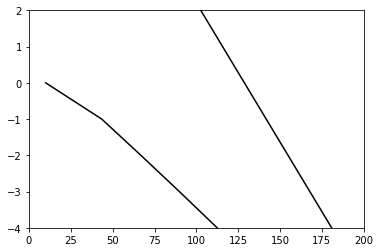

9.8777286581238641

In [79]:
plt.ylim(-4.0, 2)
plt.xlim(0,200)
plt.plot(x, y3, c=(0,0,0), label='NC')
plt.plot(x, y, c=(0,0,0), label='NC')

plt.show()
intercept


In [38]:
>>> from scipy import stats
>>> import numpy as np
>>> x = np.random.random(10)
>>> y = np.random.random(10)
>>> slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [36]:
slope

0.50781635684062065